In [ ]:
# Project : Sugarcane Production Analysis
1. data collection ( going to kaggle and download the dataset)
2. data clening ( Hanlde missing values, convert or identify data type for dataset, detect and remove outlier( unnecsaary symbols )data) 
3. EDA  (univariate analysis, Bivariate analysis, Multivaraite)
4. Data Visulization (Time series plot, bar plot, Heatmap)
5. insights and conclusion (discussing sometings)

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load or read the dataset
df = pd.read_csv("sugarcaneDatset.csv")

In [21]:
pip install openpyxl --upgrade

     -------------------------------------- 250.9/250.9 kB 1.4 MB/s eta 0:00:00
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [27]:
df

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768.678.382,3.668531,10.226.205,75.1675
1,India,Asia,348.448.000,260721.000000,4.950.000,70.3935
2,China,Asia,123.059.739,88287.000000,1.675.215,73.4591
3,Thailand,Asia,87.468.496,1.264303,1.336.575,65.4422
4,Pakistan,Asia,65.450.704,324219.000000,1.130.820,57.8790
...,...,...,...,...,...,...
98,Lebanon,Asia,97,16.000000,3,28.3864
99,Djibouti,Africa,53,51.000000,NaN,NaN
100,Singapore,Asia,50,9.000000,2,25.0000
101,Samoa,Oceania,12,6.000000,1,11.9498


In [29]:
# data cleaning and clean the dataset by removing periods of a thounsands seperate and convert to numeric
df["Production (Tons)"] = pd.to_numeric(df["Production (Tons)"].str.replace(".", "", regex=False), errors="coerce")
df["Acreage (Hectare)"] =  pd.to_numeric(df["Acreage (Hectare)"].str.replace(".", "", regex=False), errors="coerce")

# drop rows with misssing values
df_clean = df.dropna()

# selected numeric columns for correlation

numeric_df = df_clean.select_dtypes(include="number")

In [31]:
numeric_df

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,768678382,3.668531,10226205.0,75.1675
1,348448000,260721.000000,4950000.0,70.3935
2,123059739,88287.000000,1675215.0,73.4591
3,87468496,1.264303,1336575.0,65.4422
4,65450704,324219.000000,1130820.0,57.8790
...,...,...,...,...
97,394,8.000000,9.0,43.5965
98,97,16.000000,3.0,28.3864
100,50,9.000000,2.0,25.0000
101,12,6.000000,1.0,11.9498


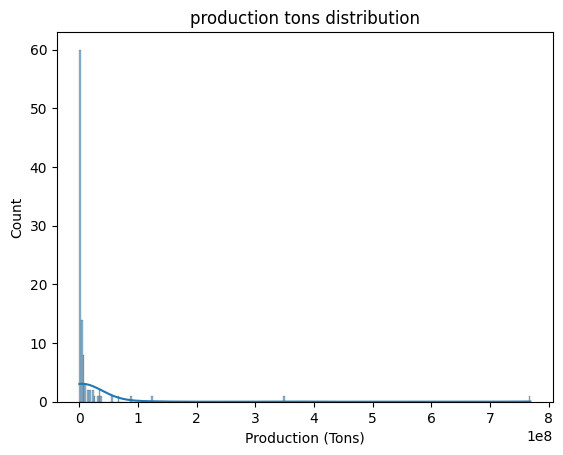

In [33]:
# EDA
#1.Univaraite analysis
sns.histplot(numeric_df["Production (Tons)"], kde=True)
plt.title("production tons distribution")
plt.show()

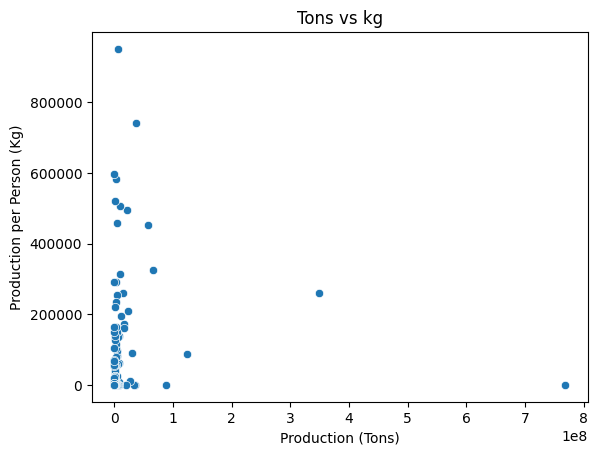

In [37]:
#2. Bivariate Analysis
sns.scatterplot(x="Production (Tons)", y="Production per Person (Kg)", data=numeric_df)
plt.title("Tons vs kg")
plt.show()

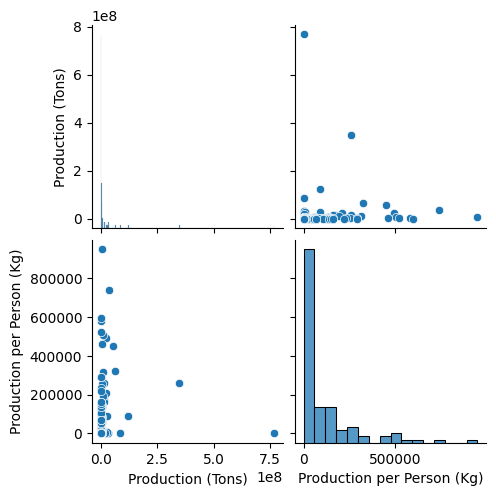

In [35]:
# 3. Multivariate analysis
sns.pairplot(numeric_df[["Production (Tons)", "Production per Person (Kg)",]])
plt.show()

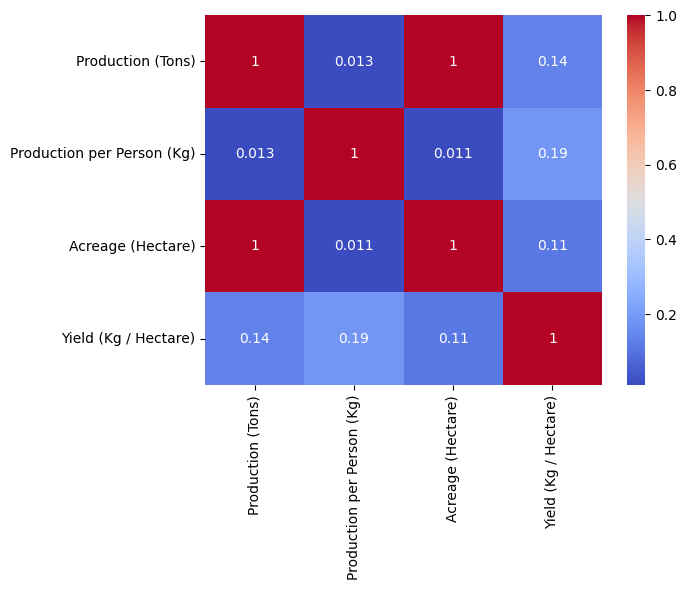

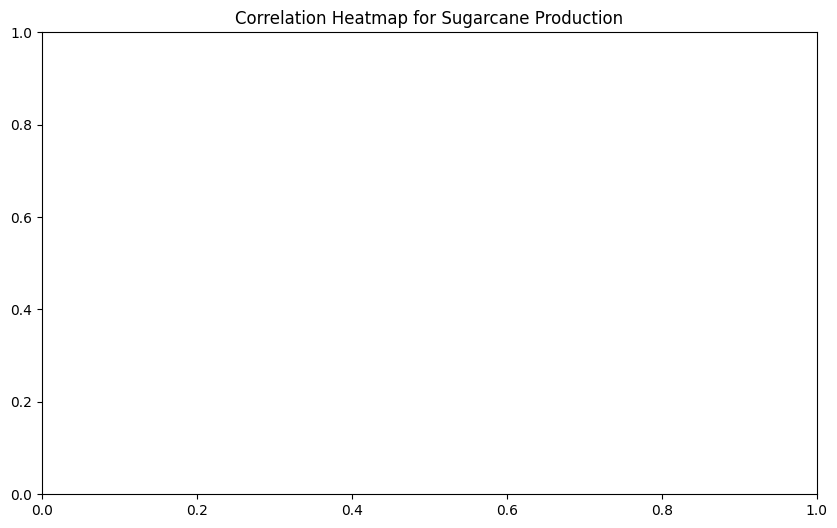

In [39]:
# generate the correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.figure(figsize = (10, 6))
plt.title("Correlation Heatmap for Sugarcane Production")
plt.show()

In [43]:
# Sort the One Variable data on dataset
df_sorted = numeric_df.sort_values("Production (Tons)", ascending=False)


In [53]:
df_clean

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3.668531,10226205.0,75.1675
1,India,Asia,348448000,260721.000000,4950000.0,70.3935
2,China,Asia,123059739,88287.000000,1675215.0,73.4591
3,Thailand,Asia,87468496,1.264303,1336575.0,65.4422
4,Pakistan,Asia,65450704,324219.000000,1130820.0,57.8790
...,...,...,...,...,...,...
97,Spain,Europe,394,8.000000,9.0,43.5965
98,Lebanon,Asia,97,16.000000,3.0,28.3864
100,Singapore,Asia,50,9.000000,2.0,25.0000
101,Samoa,Oceania,12,6.000000,1.0,11.9498


C:\Users\subbu\AppData\Local\Temp\ipykernel_17284\3837797830.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "Production (Tons)", y = "Country", data= df_clean, palette="viridis")


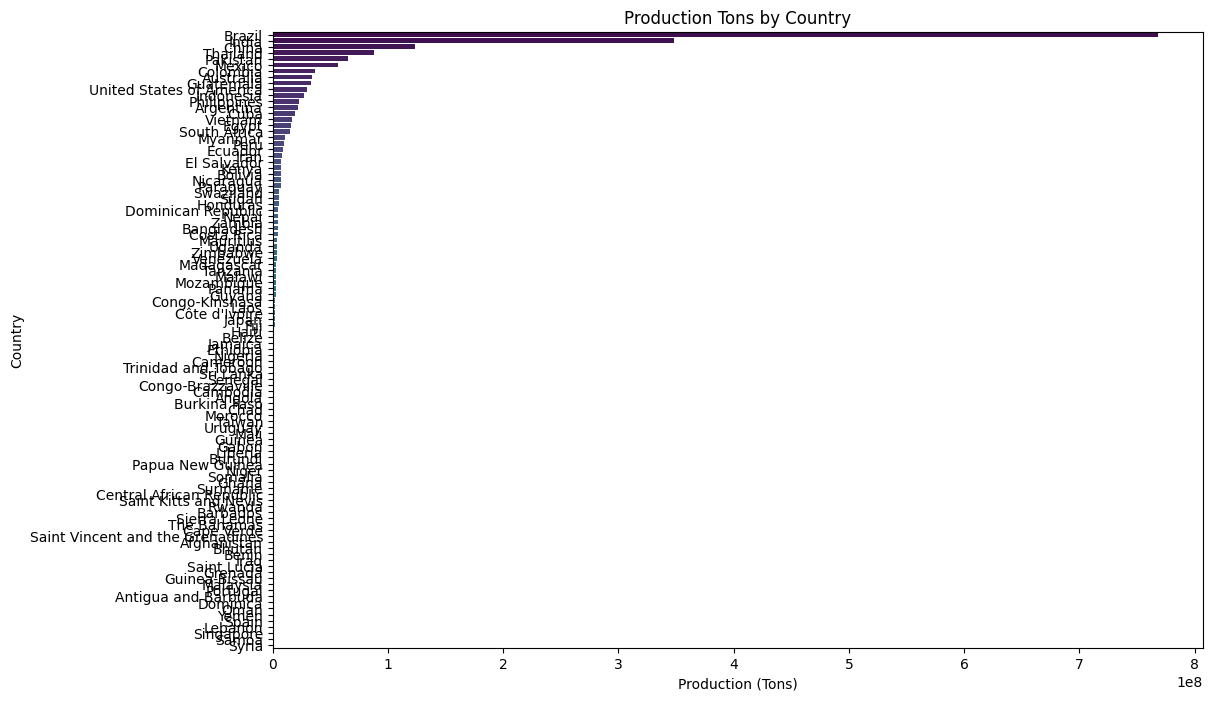

In [55]:
# Bar Plot on Production Tons by Country
plt.figure(figsize=(12, 8))
sns.barplot(x= "Production (Tons)", y = "Country", data= df_clean, palette="viridis")
plt.title("Production Tons by Country")
plt.xlabel("Production (Tons)")
plt.ylabel("Country")
plt.show()

In [59]:
# Time Series analysis
# simulaate a sequence of year and track production for the top  5 countries
import numpy as np
years = np.arange(2000, 2025) # generate years from 2000 to 2024
top_countries =  df_clean["Country"].head(5)

In [65]:
np.random.seed(42) 
simulated_data = {country: np.cumsum(np.random.randn(len(years)) * 1e6 + df_clean[df_clean["Country"] == country] ["Production (Tons)"].values[0])
                  for country in top_countries 
                 }

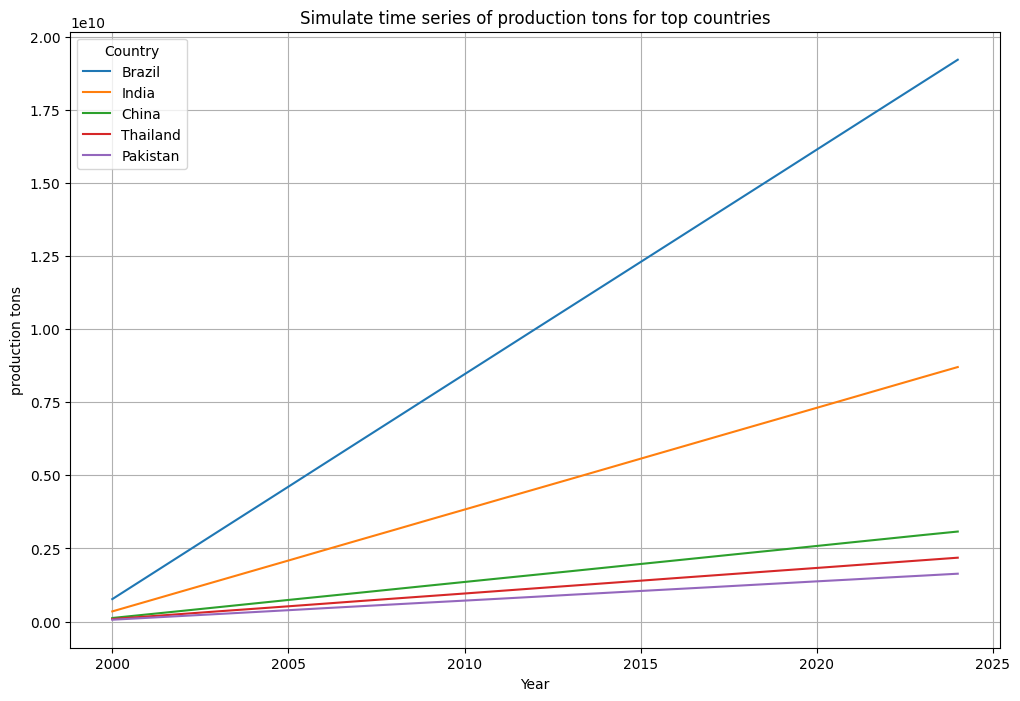

In [71]:
# create time series plots
plt.figure(figsize=(12, 8))
for country, production in simulated_data.items():
    plt.plot(years, production,  label=country)
plt.title("Simulate time series of production tons for top countries")
plt.xlabel("Year")
plt.ylabel("production tons")
plt.legend(title="Country")
plt.grid(True)
plt.show()